In [2]:
from astroquery.gaia import Gaia
Gaia.MAIN_GAIA_TABLE = "gaiadr2.gaia_source"  # Select Data Release 2
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"  # Reselect Data Release 3, default

In [3]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

coord = SkyCoord(ra=280, dec=-60, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(0.1, u.deg)
height = u.Quantity(0.1, u.deg)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)
r.pprint(max_lines=12, max_width=130)

INFO: Query finished. [astroquery.utils.tap.core]
         dist             solution_id             DESIGNATION          ... ebpminrp_gspphot_upper libname_gspphot
                                                                       ...          mag                          
--------------------- ------------------- ---------------------------- ... ---------------------- ---------------
0.0026043272506403484 1636148068921376768 Gaia DR3 6636090334814214528 ...                     --                
 0.003361667853091105 1636148068921376768 Gaia DR3 6636090339112400000 ...                     --                
 0.003849880182859702 1636148068921376768 Gaia DR3 6636090339113063296 ...                     --                
                  ...                 ...                          ... ...                    ...             ...
 0.019751317240130007 1636148068921376768 Gaia DR3 6636090407832546944 ...                 0.1176           MARCS
 0.019916769172899088 1636148068921376

In [4]:
Gaia.ROW_LIMIT = -1
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)
r.pprint(max_width=140)

INFO: Query finished. [astroquery.utils.tap.core]
         dist             solution_id             DESIGNATION          ... ebpminrp_gspphot_lower ebpminrp_gspphot_upper libname_gspphot
                                                                       ...          mag                    mag                          
--------------------- ------------------- ---------------------------- ... ---------------------- ---------------------- ---------------
0.0026043272506403484 1636148068921376768 Gaia DR3 6636090334814214528 ...                     --                     --                
 0.003361667853091105 1636148068921376768 Gaia DR3 6636090339112400000 ...                     --                     --                
 0.003849880182859702 1636148068921376768 Gaia DR3 6636090339113063296 ...                     --                     --                
  0.00442260392058112 1636148068921376768 Gaia DR3 6636090339112213760 ...                     --                     --        

In [5]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

Gaia.ROW_LIMIT = 50  # Ensure the default row limit.
coord = SkyCoord(ra=280, dec=-60, unit=(u.degree, u.degree), frame='icrs')
j = Gaia.cone_search_async(coord, radius=u.Quantity(1.0, u.deg))
r = j.get_results()
r.pprint()

INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             DESIGNATION          ...          dist        
                                                 ...                      
------------------- ---------------------------- ... ---------------------
1636148068921376768 Gaia DR3 6636090334814214528 ... 0.0026043272506403484
1636148068921376768 Gaia DR3 6636090339112400000 ...  0.003361667853091105
1636148068921376768 Gaia DR3 6636090339113063296 ...  0.003849880182859702
1636148068921376768 Gaia DR3 6636090339112213760 ...   0.00442260392058112
1636148068921376768 Gaia DR3 6636090334814217600 ...  0.004545515007406694
1636148068921376768 Gaia DR3 6636089583198816640 ...  0.005613919982422015
1636148068921376768 Gaia DR3 6636090334814218752 ...  0.005845777923111196
1636148068921376768 Gaia DR3 6636090334814213632 ...  0.006210490970144272
1636148068921376768 Gaia DR3 6636090339112308864 ...  0.007466944025534964
1636148068921376768 Gaia DR3 6636089583198816512 .

In [6]:
from astroquery.gaia import Gaia
tables = Gaia.load_tables()
print(tables[0])

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
TAP Table name: external.external.apassdr9
Description: The AAVSO Photometric All-Sky Survey - Data Release 9
    This publication makes use of data products from the AAVSO
    Photometric All Sky Survey (APASS). Funded by the Robert Martin Ayers
    Sciences Fund and the National Science Foundation. Original catalogue released by Henden et al. 2015 AAS Meeting #225, id.336.16. Data retrieved using the VizieR catalogue access tool, CDS, Strasbourg, France. The original description of the VizieR service was published in A&AS 143, 23. VizieR catalogue II/336.
Num. columns: 25


In [7]:
from astroquery.gaia import Gaia
gaiadr3_table = Gaia.load_table('gaiadr3.gaia_source')
print(gaiadr3_table)

Retrieving table 'gaiadr3.gaia_source'
TAP Table name: gaiadr3.gaiadr3.gaia_source
Description: This table has an entry for every Gaia observed source as published with this data release. It contains the basic source parameters, in their final state as processed by the Gaia Data Processing and Analysis Consortium from the raw data coming from the spacecraft. The table is complemented with others containing information specific to certain kinds of objects (e.g.~Solar--system objects, non--single stars, variables etc.) and value--added processing (e.g.~astrophysical parameters etc.). Further array data types (spectra, epoch measurements) are presented separately via Datalink resources.
Num. columns: 152


In [8]:
for column in gaiadr3_table.columns:
  print(column.name)

solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pm
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
nu_eff_used_in_astrometry
pseudocolour
pseudocolour_error
ra_pseudocolour_corr
dec_pseudocolour_corr
parallax_pseudocolour_corr
pmra_pseudocolour_corr
pmdec_pseudocolour_corr
astrometric_matched_transits
visibility_periods_used
astrometric_sigma5d_max
matched_transits
new_matched_transits
matched_transits_removed
ipd_gof_harmonic_amplitude
ipd_gof_harmonic_phase
ipd_frac_multi_peak
ipd_frac_odd_win
ruwe
scan_direction_strength_k1
scan_di

In [9]:
import pandas as pd
astro = pd.read_csv('GaiaDR3_XPmergeXPsampling.zip')

ValueError: Multiple files found in ZIP file. Only one file per ZIP: ['README.txt', '__MACOSX/._README.txt', 'XpSampling_v375wiv142r.csv', '__MACOSX/._XpSampling_v375wiv142r.csv', 'XpMerge_v375wiv142r.csv', '__MACOSX/._XpMerge_v375wiv142r.csv']

In [ ]:
print(tables)

In [ ]:
print(tables[1])

In [ ]:
print(tables[2])

In [19]:
job = Gaia.launch_job("select top 100 "
                      "solution_id,ref_epoch,ra_dec_corr,astrometric_n_obs_al, "
                      "matched_transits,duplicated_source,phot_variable_flag "
                      "from gaiadr3.gaia_source order by source_id")
r = job.get_results()
print(r['ra_dec_corr'])

ra_dec_corr 
------------
  0.12293493
  0.16325329
   0.1152631
  0.03106277
 0.090631574
  0.25799984
  0.15041357
  0.15176746
  0.19033876
  0.18675442
         ...
  0.03700819
-0.047490653
  0.18519369
  0.11701631
  0.14461127
  0.05615686
  0.26646927
-0.019807748
  0.81679803
 -0.07291612
 -0.12864673
Length = 100 rows


In [20]:
print(job)

<Table length=100>
        name          dtype  unit                          description                         
-------------------- ------- ---- -------------------------------------------------------------
         solution_id   int64                                                Solution Identifier
           ref_epoch float64   yr                                               Reference epoch
         ra_dec_corr float32                Correlation between right ascension and declination
astrometric_n_obs_al   int16      Total number of observations in the along-scan (AL) direction
    matched_transits   int16                      The number of transits matched to this source
   duplicated_source    bool                            Source with multiple source identifiers
  phot_variable_flag  object                                       Photometric variability flag
Jobid: None
Phase: COMPLETED
Owner: None
Output file: 1713808776067O-result.vot
Results: None


In [62]:
job = Gaia.launch_job_async("select top 3000000 designation,RA,phot_g_mean_flux " #phot_g_mean_flux is basically brightness
                            "from gaiadr3.gaia_source order by source_id")

r = job.get_results()
r

INFO: Query finished. [astroquery.utils.tap.core]


DESIGNATION,RA,phot_g_mean_flux
,deg,electron / s
object,float64,float64
Gaia DR3 4295806720,44.99615537864534,1653.39471645947
Gaia DR3 34361129088,45.00432028915398,1763.191386728999
Gaia DR3 38655544960,45.004978371745516,42030.60043942405
Gaia DR3 309238066432,44.99503714416301,272.91429606185255
Gaia DR3 343597448960,44.96389626549711,1049.3820358447672
Gaia DR3 515396233856,44.99832707810714,317.34312268458626
Gaia DR3 549755818112,45.04828232129832,19047.581229390133
Gaia DR3 828929527040,45.02361979732255,4394.201551830577


In [63]:
job = Gaia.launch_job_async("select top 3000000 designation,DEC,phot_g_mean_flux " #phot_g_mean_flux is basically brightness
                            "from gaiadr3.gaia_source order by source_id")

d = job.get_results()
d

INFO: Query finished. [astroquery.utils.tap.core]


DESIGNATION,DEC,phot_g_mean_flux
,deg,electron / s
object,float64,float64
Gaia DR3 4295806720,0.005615226341865997,1653.39471645947
Gaia DR3 34361129088,0.021047763781174733,1763.191386728999
Gaia DR3 38655544960,0.019879675701858644,42030.60043942405
Gaia DR3 309238066432,0.03815169755425531,272.91429606185255
Gaia DR3 343597448960,0.04359494367771267,1049.3820358447672
Gaia DR3 515396233856,0.0663327072023917,317.34312268458626
Gaia DR3 549755818112,0.04825396034378256,19047.581229390133
Gaia DR3 828929527040,0.06841876724959775,4394.201551830577


In [56]:
import sys
PATH = '/Users/rjada/astro-python' 
sys.path.append(PATH)


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

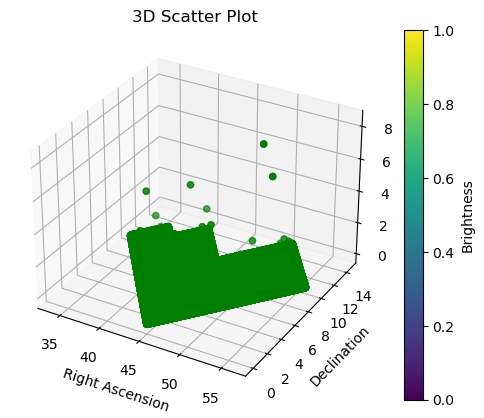

In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(r['RA'], d['DEC'], r['phot_g_mean_flux'], c='green', marker='o', label='Data Points')

ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.set_zlabel('Brightness')

cbar = plt.colorbar(ax.scatter(r['RA'], d['DEC'], r['phot_g_mean_flux'], c='green'))
cbar.set_label('Brightness')

ax.set_title('3D Scatter Plot')

plt.show()


In [13]:
import seaborn as sns

<Axes: xlabel='RA', ylabel='DEC'>

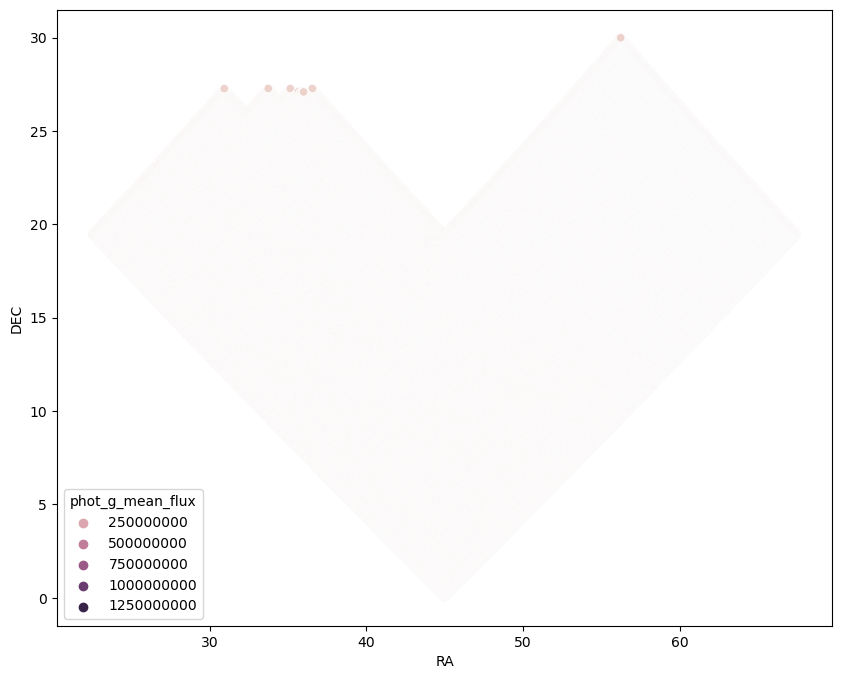

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize = (10, 8))
sns.scatterplot(data=job, x=r['RA'], y=d['DEC'], hue = r['phot_g_mean_flux'])

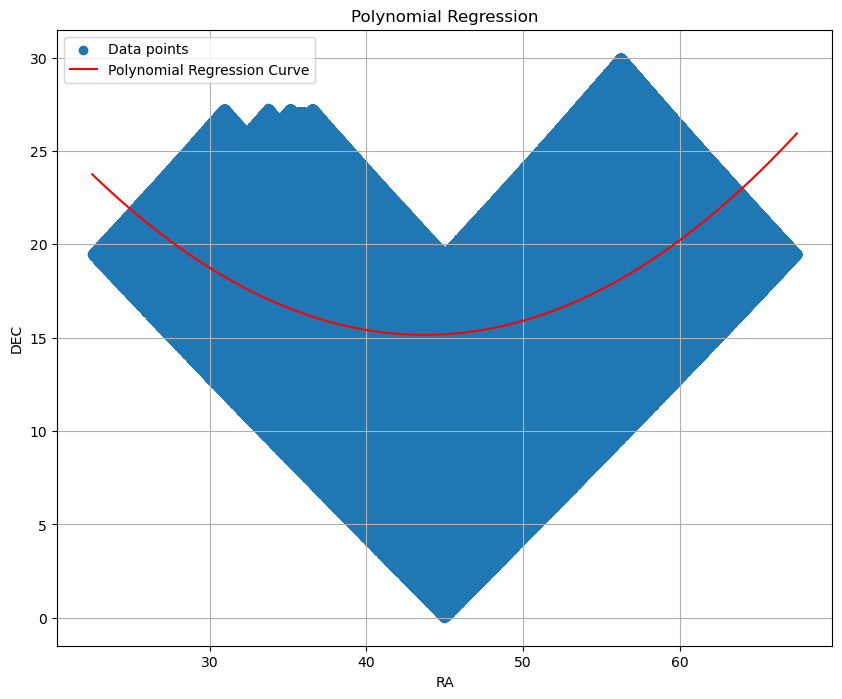

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded your data into the 'job', 'r', and 'd' DataFrames
# Replace the placeholders with your actual data

# Perform polynomial regression (degree 2, adjust as needed)
coeffs = np.polyfit(r['RA'], d['DEC'], 2)

# Generate points along the polynomial curve
x_curve = np.linspace(min(r['RA']), max(r['RA']), 100)
y_curve = np.polyval(coeffs, x_curve)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(r['RA'], d['DEC'], label='Data points')

# Plot the polynomial curve
plt.plot(x_curve, y_curve, color='red', label='Polynomial Regression Curve')

# Customize the plot (add labels, legend, etc.)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()


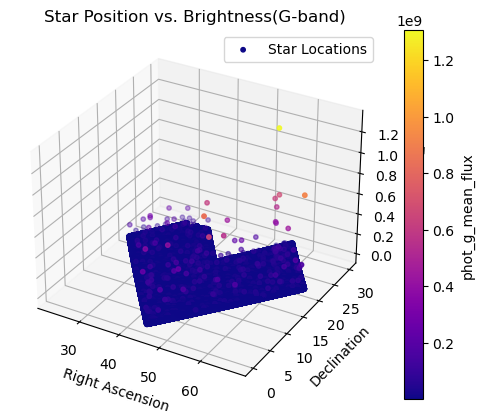

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture

# Assuming r['RA'] and d['DEC'] are your data
X = np.column_stack((r['RA'].data, d['DEC'].data))
z = r['phot_g_mean_flux'].data

# Fit a GMM with 4 components
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(X)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the original data with a colormap
sc = ax.scatter(X[:, 0], X[:, 1], z, c=z, cmap='plasma', s=10, label='Star Locations')

ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.set_zlabel('phot_g_mean_flux')
ax.set_title('Star Position vs. Brightness(G-band)')
ax.legend()

# Add a colorbar to show the colormap
cbar = plt.colorbar(sc)
cbar.set_label('phot_g_mean_flux')

plt.show()
